# Array Functions

## Introduction to Array functions

We have seen before how many for-loops over arrays can be avoided using e.g. the dot-operator, which evaluates functions and operators element-wise. A number of other helper functions are available to extend this so-called *vectorization* technique, and allow for shorter code that is easier to understand and which might execute faster.

For example, a very common operation is to sum all the elements of an array. While this is easy to do with a for-loop, the function `sum` makes it even easier:

In [1]:
x = rand(1:100, 5)
println("Sum of ", x, " = ", sum(x))

Sum of [82, 12, 4, 59, 67] = 224


The `sum` function can also take an additional dimension argument `dims`, to specify which dimension it should add along. For example, it can add all the elements in each column (along dimension 1, producing a vector of sums):

In [2]:
A = rand(-100:100, 3, 5)

3×5 Matrix{Int64}:
 -35  -70  82   24  -33
  18    0  60   -4   65
   3   92  62  -60  -76

In [3]:
sum(A, dims=1)

1×5 Matrix{Int64}:
 -14  22  204  -40  -44

or it can add all the elements in each row (along dimension 2):

In [4]:
sum(A, dims=2)

3×1 Matrix{Int64}:
 -32
 139
  21

Note that while these functions reduce a 2D array to a 1D array, the output is still a 2D array (a row of a column vector). The syntax `[:]` after any array will convert it to a 1D array, which might be needed for example when using the array as indices.

In [5]:
sum(A, dims=1)[:]

5-element Vector{Int64}:
 -14
  22
 204
 -40
 -44

Some other examples of these so-called *array reduction* functions are shown below.

In [6]:
x = rand(1:100, 5)
display(x)
prod(x)                         # Product of all elements

5-element Vector{Int64}:
 31
 60
 62
 82
 85

803780400

In [7]:
display(A)
display(maximum(A, dims=1))     # Largest element in each column
display(minimum(A, dims=1))     # Smallest element in each column

3×5 Matrix{Int64}:
 -35  -70  82   24  -33
  18    0  60   -4   65
   3   92  62  -60  -76

1×5 Matrix{Int64}:
 18  92  82  24  65

1×5 Matrix{Int64}:
 -35  -70  60  -60  -76

The *cumulative* sum and product functions work in a similar way, but produce arrays of the same size as the original array:

In [8]:
x = 1:5
display(cumsum(x))                   # Cumulative sum, that is, entry n is the sum of x_1,...,x_n
display(cumprod(x))                  # Cumulative product

5-element Vector{Int64}:
  1
  3
  6
 10
 15

5-element Vector{Int64}:
   1
   2
   6
  24
 120

In [9]:
A = reshape(1:6, 2, 3)

2×3 reshape(::UnitRange{Int64}, 2, 3) with eltype Int64:
 1  3  5
 2  4  6

In [10]:
cumsum(A, dims=1)                    # Cumulative sum along dimension 1 (that is, column-wise)

2×3 Matrix{Int64}:
 1  3   5
 3  7  11

In [11]:
cumprod(A, dims=2)                   # Cumulative product along dimension 2

2×3 Matrix{Int64}:
 1  3  15
 2  8  48

## Example: Taylor polynomial using array functions

In part 1, we used for-loops to evaluate the Taylor polynomial for $\cos x$ of a given degree $2n$:

```julia
function taylor_cos(x,n)
    term = 1
    y = 1
    for k = 1:n
        term *= -x^2 / ((2k-1) * 2k)
        y += term
    end
    y
end
```

We can rewrite this in a vectorized form by using the `cumprod` and the `sum` functions. Note that each term in the sum is built up by multiplying the previous term by the expression `-x^2 / ((2k-1) * 2k)`. This means we can create a vector with these values, and create *all* the terms using the `cumprod` function. Finally, the Taylor polynomial is obtained by adding all the terms using the `sum` function, and manually adding the first term 1 which is a special case:

In [12]:
function taylor_cos(x,n)
    factors = [ -x^2 / ((2k-1) * 2k) for k = 1:n ]
    y = 1 + sum(cumprod(factors))
end

taylor_cos (generic function with 1 method)

In [13]:
println(taylor_cos(10, 50)) # Taylor approximation
println(cos(10))            # true value

-0.8390715290752269
-0.8390715290764524


Since we now know how to plot functions, let us make the typical calculus plot that compares Taylor polynomial approximations of different degrees. Note how we can generate a 2D array `yy_taylor` of 6 different Taylor polynomials, for all values of `x`, using an array comprehension.

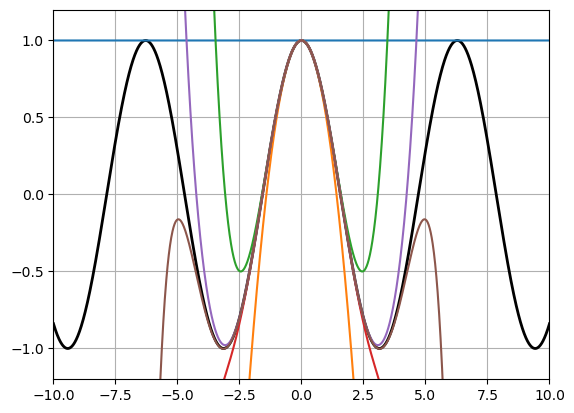

In [14]:
xx = -10:0.01:10
yy = cos.(xx)
yy_taylor = [ taylor_cos(x,n) for x in xx, n in 0:5 ]

using PyPlot
plot(xx, yy, linewidth=2, color="k")
plot(xx, yy_taylor)
grid(true)
axis([-10,10,-1.2,1.2]);

## Array functions for indices and booleans

Another useful set of array functions are based on indices and boolean variables. For example, the `in` function (or the $\in$ symbol) will loop through an array and return `true` if a given number appears anywhere in the array:

In [15]:
x = 1:2:1000                 # Odd numbers
println(503 in x)            # True, 503 is in the list
println(1000 ∈ x)            # False, 1000 is not in the list

true
false


The `all` function returns `true` if all elements in a boolean array are `true`:

In [16]:
println(all(x .< 500))
println(all(x .> 0))

false
true


The `any` function returns `true` if any element in a boolean array is `true`:

In [17]:
println(any(x .== 503))
println(any(x .== 1000))

true
false


We can also find the *index* of e.g. the first element that is `true` in a boolean array:

In [18]:
idx = findfirst(x .== 503)    # Index in x with the value 503

252

or more generally, a vector with the indices to *all* the elements that are `true`:

In [19]:
ind = findall(@. x % 97 == 0)
println("Indices in x with numbers that are multiples of 97: ", ind)

Indices in x with numbers that are multiples of 97: [49, 146, 243, 340, 437]


Finally, the `count` function returns the number of times `true` appears in a boolean array:

In [20]:
count(@. x % 97 == 0)

5